# Оптимизация маркетинговых расходов Яндекс.Афиша

Яндекс.Афиша — русскоязычный сервис по продаже билетов на развлекательные мероприятия: театры, концерты, кино, мюзиклы, шоу и другие события. Необходимо оптимизировать маркетинговые затраты, проанализировав данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года:
- лог сервера с данными о посещениях сайта Яндекс.Афиши,
- выгрузка всех заказов за этот период,
- статистика рекламных расходов.  

В рамках исследования мы изучим как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент и когда клиент окупается.

**Этапы исследования:**

1. Обзор данных
2. Предварительная обработка данных
3. Построение отчетов и расчет метрик
    3.1. Анализ пользовательской активности
    3.1. Анализ продаж
    3.1. Анализ маркетинга
4. Вывод и рекомендации

<a name="h1"></a>
### 1. Обзор данных

#### Импорт библиотек

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.ticker as ticker

import seaborn as sns

#### Настройка

In [2]:
#отключение предупреждений
import warnings
warnings.filterwarnings('ignore')

#отображение данных до двух знаков после запятой
pd.set_option('display.precision', 2)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### Анализ файлов

In [3]:
visits = pd.read_csv('visits_log.csv')
orders = pd.read_csv('orders_log.csv')
costs = pd.read_csv('costs.csv')

##### Лог сервера с данными о посещениях сайта Яндекс.Афиши

In [4]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [5]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


##### Выгрузка заказов

In [6]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


##### Статистика рекламных расходов

In [8]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [9]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


**Вывод**  
Представлены данные о посещениях и заказах, совершенных на сайте Яндекс.Афиша с июня 2017 по конец мая 2018 года. За рассматриваемый период сайт посетили 359 400 раз, при этом было совершено 50 415 заказов, т.е. в среднем в день на сайт заходили почти 1 000 человек, при этом  примерно каждый 7 визит заканчивался покупкой. Для дальнейшего анализа нам необходимо подготовить данные:  

1. преобразовать названия столбцов (привести к нижнему регистру и избавиться от пробелов);
2. изменить тип данных в датах.

<a name="h2"></a>
### 2. Предварительная обработка данных

#### Преобразование названий столбцов

Чтобы переименовать столбцы воспользуемся атрибутом *columns*.

In [10]:
visits.columns

Index(['Device', 'End Ts', 'Source Id', 'Start Ts', 'Uid'], dtype='object')

In [11]:
orders.columns

Index(['Buy Ts', 'Revenue', 'Uid'], dtype='object')

In [12]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']

In [13]:
orders.columns = ['buy_ts', 'revenue', 'uid']

#### Изменение типа данных

Для правильного указания параметров функции для изменения типа данных еще раз выведем строки из таблиц.

In [14]:
visits.sample(1)
orders.sample(1)
costs.sample(1)

,device,end_ts,source_id,start_ts,uid
46113,desktop,2017-12-28 13:07:00,4,2017-12-28 13:05:00,7236094862565539187


,buy_ts,revenue,uid
19600,2017-11-24 18:32:00,4.03,1077804651417205618


,source_id,dt,costs
1292,4,2017-12-21,219.21


Воспользуемся *pd.to_datetime* для изменения формата дат.

In [15]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format="%Y-%m-%d %H:%M:%S")

In [16]:
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format="%Y-%m-%d %H:%M:%S")

In [17]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format="%Y-%m-%d %H:%M:%S")

In [18]:
costs['dt'] = pd.to_datetime(costs['dt'], format="%Y-%m-%d")

Проверим результат с помощью *dtypes*.

In [19]:
visits.dtypes

device               object
end_ts       datetime64[ns]
source_id             int64
start_ts     datetime64[ns]
uid                  uint64
dtype: object

In [20]:
orders.dtypes

buy_ts     datetime64[ns]
revenue           float64
uid                uint64
dtype: object

In [21]:
costs.dtypes

source_id             int64
dt           datetime64[ns]
costs               float64
dtype: object

Типы данных и названия столбцов корректны. Можно приступать к анализу.

<a name="h3"></a>
### 3. Построение отчетов и расчет метрик

<a name="h3.1"></a>
#### 3.1 Анализ пользовательской активности

Необходимо ответить на следующие вопросы:  
- [Сколько людей пользуются в день, неделю, месяц?](#h3.1.1)
- [Сколько сессий в день?](#h3.1.2)
- [Сколько длится одна сессия?](#h3.1.3)
- [Как часто люди возвращаются?](#h3.1.4)

<a name="h3.1.1"></a>
###### Активность пользователей

Для анализа пользовательской активности выделим в отдельные столбцы полную дату, неделю, месяц и год визита. Также добавим столбец с продолжительностью каждой сессии.

In [22]:
visits['session_date'] = visits['start_ts'].dt.date

In [23]:
visits['session_week'] = visits['start_ts'].dt.week

In [24]:
visits['session_month'] = visits['start_ts'].dt.month

In [25]:
visits['session_year'] = visits['start_ts'].dt.year

In [26]:
visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds()

Сгруппируем данные по периодам и подсчитаем количество уникальных пользователей.

In [27]:
dau = visits.groupby('session_date').agg({'uid': 'nunique'})

In [28]:
wau = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'})

In [29]:
mau = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'})

In [30]:
print('Количество уникальных пользователей в день:', int(dau.mean()))
print('Количество уникальных пользователей в неделю:', int(wau.mean()))
print('Количество уникальных пользователей в месяц:', int(mau.mean()))

Количество уникальных пользователей в день: 907
Количество уникальных пользователей в неделю: 5716
Количество уникальных пользователей в месяц: 23228


<a name="h3.1.2"></a>
###### Количество сессий в день

In [31]:
print('Количество сессий в день:', int(visits.groupby('session_date').agg({'uid': 'count'}).mean()))

Количество сессий в день: 987


Почти 1 000 раз в день пользователи заходят на сайт Яндекс.Афиша. Рассмотрим с каких устройств посетители чаще заходят на сайт и какой рекламный источник работает эффективнее.

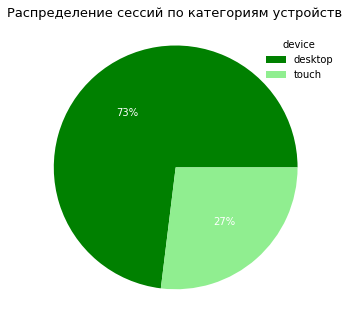

In [32]:
#с помощью круговой диаграммы проиллюстрируем распределение сессий по категориям устройств
report = visits.groupby('device').agg({'uid': 'count'}).reset_index()
fig, ax = plt.subplots(figsize=(6, 5), subplot_kw=dict(aspect="equal"))
ax.pie(report['uid'], labels=report['device'], autopct='%1.f%%', textprops=dict(color="w"),
       pctdistance=0.6, colors=['green', 'lightgreen'])

#оформление
ax.set_title("Распределение сессий по категориям устройств", fontsize=13, pad = 14)
ax.legend(title="device", loc="upper right", frameon=False)
plt.rcParams['font.size'] = 12
ax.axis("equal");

In [33]:
report

,device,uid
0,desktop,262567
1,touch,96833


Пропишем функцию для создания столбчатых графиков

In [34]:
def sns_barplot(data, x, y):
    plt.figure(figsize=(16,6))
    ax = sns.barplot(x=x, y=y, data=data, palette=sns.color_palette("GnBu", 13))
    ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)

    for p in ax.patches:
        height = p.get_height()
        if np.isnan(height):
            height = 0
        ax.text(p.get_x() + p.get_width()/2., height, '%d' % int(height), 
            fontsize=11, ha='center', va='bottom')

Сгруппируем данные таблицы `visits` по рекламным источникам и отобразим информацию на графике

In [35]:
visits_by_source_id = visits.groupby('source_id')['uid'].count().reset_index()

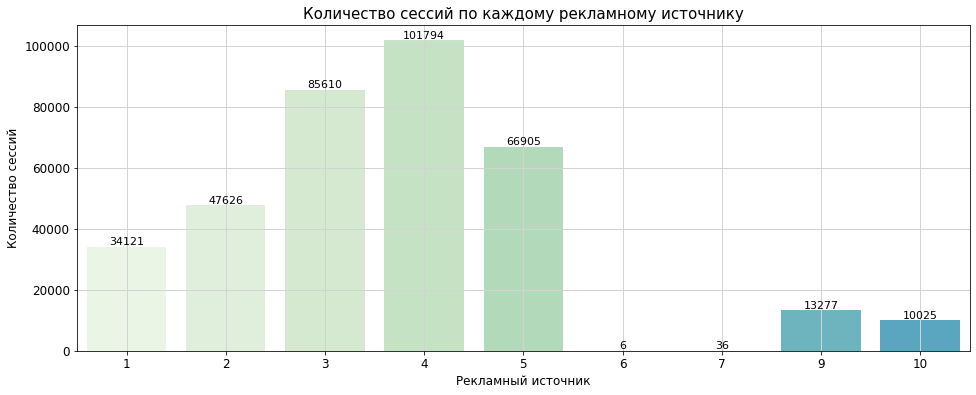

In [36]:
sns_barplot(visits_by_source_id, 'source_id', 'uid')

plt.title("Количество сессий по каждому рекламному источнику", fontsize = 15)
plt.xlabel("Рекламный источник", fontsize = 12, fontweight=500)
plt.ylabel('Количество сессий', fontsize = 12, fontweight=500);

Больше всего посетителей было привлечено рекламными источниками №4 и 3.

<a name="h3.1.3"></a>
###### Продолжительность сессий

Прежде чем анализировать продолжительность сессий, исключим из выборки посещения продолжительностью 0 секунд, поскольку по факту пользователь не взаимодействовал с сайтом.

In [37]:
visits_with_duration = visits[visits['session_duration'] != 0]

In [38]:
#разделим датафрейм по категориям устройств
desktop_visits = visits_with_duration[visits_with_duration['device'] == 'desktop']
touch_visits = visits_with_duration[visits_with_duration['device'] == 'touch']

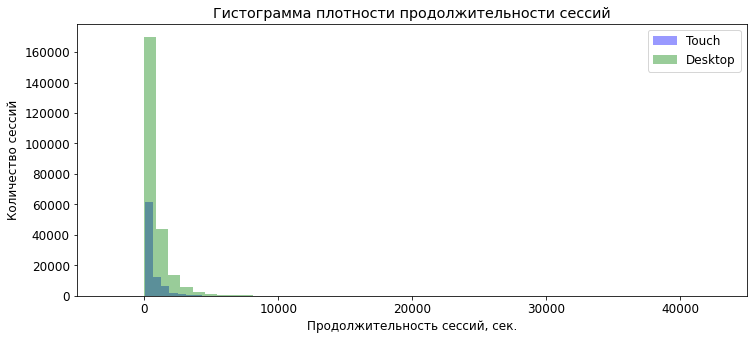

In [39]:
#построим гистограммы в разрезе устройств
fig, ax = plt.subplots(figsize=(12,5))
sns.distplot(touch_visits['session_duration'], hist = True, kde = False, rug = False,
             label="Touch", color = 'blue', rug_kws={'color': 'red'})

sns.distplot(desktop_visits['session_duration'], hist = True, kde = False, rug = False,
             label="Desktop", color = 'green', rug_kws={'color': 'green'})

plt.title('Гистограмма плотности продолжительности сессий')
plt.xlabel('Продолжительность сессий, сек.')
plt.ylabel('Количество сессий')
plt.legend();

Гистограммы смещены влево, поэтому для расчета метрики **ASL** лучше использовать моду, а не среднее значение.

In [40]:
print('Средняя продолжительность сессии:', int(visits_with_duration['session_duration'].mode()), 'сек.')
print('Средняя продолжительность сессии на устройствах touch:', int(touch_visits['session_duration'].mode()),'сек.')
print('Средняя продолжительность сессии на устройствах desktop:', int(desktop_visits['session_duration'].mode()),'сек.')

Средняя продолжительность сессии: 60 сек.
Средняя продолжительность сессии на устройствах touch: 60 сек.
Средняя продолжительность сессии на устройствах desktop: 60 сек.


Обычно пользователю достаточно 1 мин., чтобы найти необходимую информацию на сайте, при этом не имеет значения какое устройство он использует для этого.

<a name="h3.1.4"></a>
###### Стабильность пользовательской базы

In [41]:
sticky_wau = dau.mean() / wau.mean() * 100
sticky_mau = dau.mean() / mau.mean() * 100

In [42]:
print('Доля уникальных пользователей в день среди уникальных пользователей в неделю:', int(sticky_wau), '%')
print('Доля уникальных пользователей в день среди уникальных пользователей в месяц:', int(sticky_mau), '%')

Доля уникальных пользователей в день среди уникальных пользователей в неделю: 15 %
Доля уникальных пользователей в день среди уникальных пользователей в месяц: 3 %


Рассчитаем коэффициент удержания - **Retention Rate в разрезе когорт**

In [43]:
visits['session_month'] = visits['start_ts'].astype('datetime64[M]')

In [44]:
#определим месяц, когда пользователи впервые совершали активность на сайте и добавим эту информацию в исходный файл
first_activity_month = visits.groupby(['uid'])['session_month'].min()
first_activity_month.name = 'first_activity_month'

In [45]:
visits = visits.join(first_activity_month, on='uid')

In [46]:
#рассчитаем возраст когорт в месяцах
visits['cohort_lifetime'] = ((
    visits['session_month'] - visits['first_activity_month']) / np.timedelta64(1, 'M')).round().astype('int')

In [47]:
#сгруппируем данные по когорте и lifetime
#посчитаем для каждой когорты количество активных пользователей на определенный «месяц жизни»
cohorts_visits = visits.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

In [48]:
#найдем исходное количество пользователей в когорте
initial_users_count = cohorts_visits[cohorts_visits['cohort_lifetime'] == 0][['first_activity_month','uid']]

In [49]:
#переименуем столбцы
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

In [50]:
#добавим информацию о первом визите
cohorts_visits = cohorts_visits.merge(initial_users_count,on='first_activity_month')

In [51]:
#рассчитаем Retention Rate
cohorts_visits['retention'] = cohorts_visits['uid']/cohorts_visits['cohort_users']

In [52]:
#для корректного отражения даты заказа на графике, изменим тип данных в столбце first_activity_month
cohorts_visits['first_activity_month'] = cohorts_visits['first_activity_month'].dt.strftime('%Y-%m')

In [53]:
retention_pivot = cohorts_visits.pivot_table(index='first_activity_month',columns='cohort_lifetime',
                                             values='retention',aggfunc='sum')

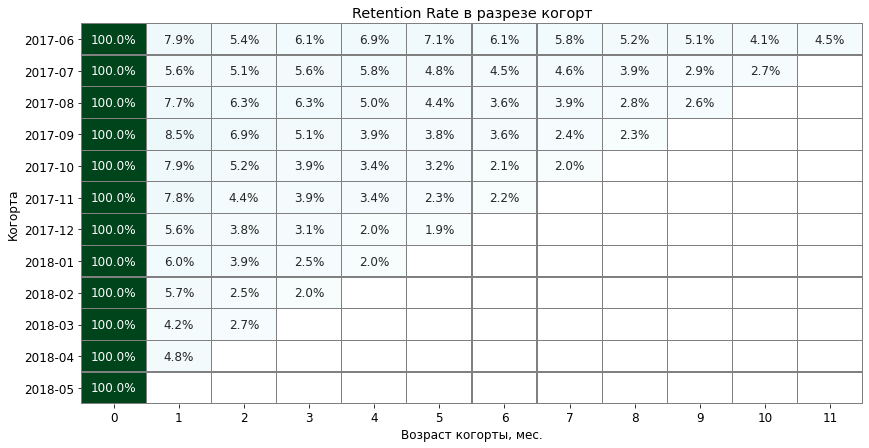

In [54]:
plt.figure(figsize=(14, 7))
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=0.2, linecolor='gray', cmap='BuGn', cbar=False)
plt.title('Retention Rate в разрезе когорт')
plt.xlabel('Возраст когорты, мес.', fontsize = 12, fontweight=500)
plt.ylabel('Когорта', fontsize = 12, fontweight=500);

**Retention Rate** очень низкий, что обусловлено спецификой предоставляемых услуг. Наиболее активные пользователи входят в июньскую когорту.

**Вывод**  
В среднем в день Яндекс.Афиша посещают 907 уникальных пользователей. С учетом общего количества сессий в день (987) можно сделать вывод, что больше 90% посетителей ограничиваются однократным посещением сайта. Почти три четверти пользователей использовали устройства категории *desktop*, а основной приток посетителей обеспечили рекламные источники *№4* и *3*.  
Как правило, пользователю достаточно 1 минуты, чтобы найти нужную информацию на сайте, при этом продолжительность сеанса не зависит от категории используемого устройства. В данном исследовании такая маленькая длительность визита не является негативным показателем, поскольку сервис нацелен на решение конкретных и простых задач, а посетители чаще всего заходят на сайт уже с пониманием того, какое именно мероприятие их интересует, что упрощает процесс и экономит время.   
Значения показателей **retention rate, sticky wau** и **sticky mau** не очень высокие - один и тот же пользователь очень редко заходит на сайт повторно в течение недели или даже месяца. Однако, учитывая специфику сервиса, такой результат ожидаем, поскольку люди редко посещают развлекательные мероприятия чаще одного раза в месяц. 

<a name="h3.2"></a>
#### 3.2 Анализ продаж

Необходимо ответить на следующие вопросы:  
- [Когда люди начинают покупать?](#h3.2.1)
- [Сколько раз покупают за период?](#h3.2.2)
- [Какой средний чек?](#h3.2.3)
- [Сколько денег приносят?](#h3.2.4)

<a name="h3.2.1"></a>
###### Время, прошедшее с момента первого визита до первой покупки

Добавим столбец с годом и месяцем даты продажи для помесячного анализа данных.

In [55]:
orders['purchase_month'] = orders['buy_ts'].dt.strftime('%Y-%m')

Для того, чтобы определить сколько времени требуется пользователям, чтобы совершить первую покупку, необходимо выполнить несколько шагов:
- на основании таблицы `visits` создать датафрейм с перечнем всех уникальных пользователей с указанием даты первого посещения, рекламного источника и категории устройства;
- дополнить таблицу `orders` данными об уникальных пользователях и рассчитать для каждого время, необходимое для совершения первой покупки;
- создать датафрейм со списком всех уникальных покупателей:
- определить среднее время.

1. Создание таблицы `users` с данными по уникальным пользователям

In [56]:
users = (visits.sort_values(by = ['uid', 'start_ts']).groupby('uid')
               .agg({'start_ts' : 'first', 'source_id': 'first', 'device': 'first'})).reset_index()

In [57]:
#проверим, что число строк в датафрейме соответствует количеству уникальных пользователей в исходной таблице
len(users)
visits['uid'].nunique()

228169

228169

2. Добавление в таблицу `orders` данных об уникальных пользователях и расчет времени, необходимого для совершения первой покупки

In [58]:
orders_new = orders.merge(users, on='uid', how='left')

In [59]:
#проверим, что пропущенные данные отсутствуют
orders_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50415 entries, 0 to 50414
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   buy_ts          50415 non-null  datetime64[ns]
 1   revenue         50415 non-null  float64       
 2   uid             50415 non-null  uint64        
 3   purchase_month  50415 non-null  object        
 4   start_ts        50415 non-null  datetime64[ns]
 5   source_id       50415 non-null  int64         
 6   device          50415 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(2), uint64(1)
memory usage: 3.1+ MB


In [60]:
#добавим столбец с указанием времени, которое прошло с момента первого посещения и до момента покупки (в сек.)
orders_new['time_for_buy'] = (orders_new['buy_ts'] - orders_new['start_ts']).dt.total_seconds()

3. Создание таблицы `buyers` с данными по уникальным покупателям

In [61]:
#создадим на основе обновленной таблицы с заказами датафрейм с уникальными покупателями и их первой покупкой
buyers = (orders_new.sort_values(by = ['uid', 'buy_ts']).groupby('uid')
               .agg({'buy_ts':'first', 'time_for_buy':'first', 'source_id':'first', 'device':'first'})).reset_index()

In [62]:
#проверим, что число строк в датафрейме соответствует количеству уникальных покупателей в исходной таблице
len(buyers)
orders['uid'].nunique()

36523

36523

4. Расчет среднего времени

In [63]:
#разделим данные по видам устройств
orders_new_desktop = orders_new[orders_new['device'] == 'desktop']
orders_new_touch = orders_new[orders_new['device'] == 'touch']

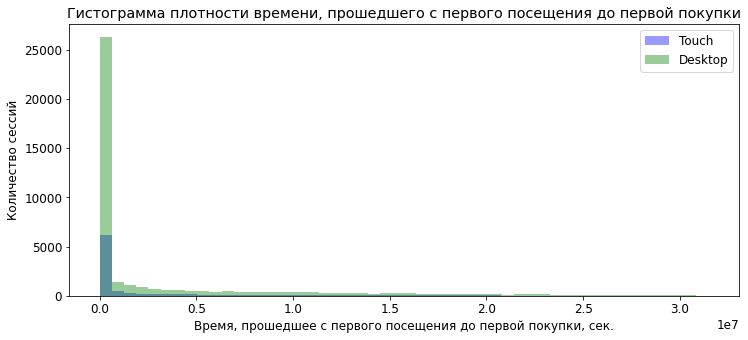

In [64]:
#построим гистограммы в разрезе устройств
fig, ax = plt.subplots(figsize=(12,5))
sns.distplot(orders_new_touch['time_for_buy'], hist = True, kde = False, rug = False,
             label="Touch", color = 'blue', rug_kws={'color': 'red'})

sns.distplot(orders_new_desktop['time_for_buy'], hist = True, kde = False, rug = False,
             label="Desktop", color = 'green', rug_kws={'color': 'green'})

plt.title('Гистограмма плотности времени, прошедшего с первого посещения до первой покупки')
plt.xlabel('Время, прошедшее с первого посещения до первой покупки, сек.')
plt.ylabel('Количество сессий')
plt.legend();

Гистограма смещена влево, при этом большая часть значений приближена к 0, поэтому для расчета метрики лучше использовать моду, а не среднее значение или медиану, поскольку первая гораздо лучше отразит типичное поведение пользователей.

In [65]:
print('Среднее время между первым посещением сайта и первой покупкой:', int(orders_new['time_for_buy'].mode()),'сек.')
print('Среднее время между первым посещением сайта и первой покупкой на устройствах desktop:', 
      int(orders_new_desktop['time_for_buy'].mode()),'сек.')
print('Среднее время между первым посещением сайта и первой покупкой на устройствах touch:', 
      int(orders_new_touch['time_for_buy'].mode()),'сек.')

Среднее время между первым посещением сайта и первой покупкой: 60 сек.
Среднее время между первым посещением сайта и первой покупкой на устройствах desktop: 60 сек.
Среднее время между первым посещением сайта и первой покупкой на устройствах touch: 0 сек.


Судя по всему пользователи устройств категории *touch* переходя на сайт сразу попадают на страницу покупки нужного билета, в то время как пользователи *desktop* еще некоторое время "блуждают" по странице. Возможно, дело в том, что интерфейс для устройств *touch* удобнее, что позволяет экономить время.

<a name="h3.2.2"></a>
###### Количество заказов

In [66]:
print('Количество заказов с июня 2017 по конец мая 2018 года:', len(orders))

Количество заказов с июня 2017 по конец мая 2018 года: 50415


In [67]:
print('Среднее количество заказов с июня 2017 по конец мая 2018 года на одного покупателя:', 
      round(
          len(orders) / orders['uid'].nunique(),
          2))

Среднее количество заказов с июня 2017 по конец мая 2018 года на одного покупателя: 1.38


Рассмотрим как распределяется **количество заказов** помесячно.

In [68]:
orders_by_month = orders.groupby(['purchase_month']).agg({'uid' : 'count', 'revenue': 'sum'}).reset_index()

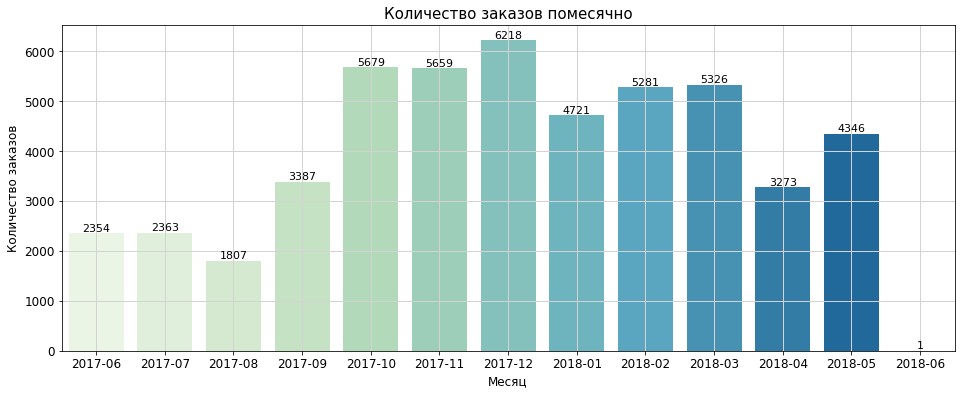

In [69]:
#отобразим на графике помесячное количество заказов
sns_barplot(orders_by_month, 'purchase_month', 'uid')

plt.title("Количество заказов помесячно", fontsize = 15)
plt.xlabel("Месяц", fontsize = 12, fontweight=500)
plt.ylabel('Количество заказов', fontsize = 12, fontweight=500);

Ожидаемо самыми урожайными оказались праздничные и предпраздничные месяцы: октябрь-декабрь и февраль-март. В целом на графике отмечается динамика увеличения количества заказов с течением времени.

Рассчитаем **количество заказов по когортам** нарастающим итогом. Для этого необходимо:
- найти месяц первой покупки для каждого покупателя и добавить его в таблицу с заказами (новая таблица `orders_new`);
- сгруппировать таблицу с заказами по месяцу первой покупки и рассчитать возраст когорт;
- отобразить на графике `heatmap` динамику количество заказов в зависимости от возраста различных когорт.

1. Определение месяца первой покупки для каждого покупателя и добавление его в таблицу с заказами

In [70]:
#выделим месяц из столбца с датами покупок
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

In [71]:
#определим месяц первой покупки для каждого покупателя
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']

In [72]:
first_orders = first_orders.merge(users, on='uid')

In [73]:
#добавим месяц первой покупки в таблицу с заказами
orders_new = pd.merge(orders,first_orders, on='uid')
orders_new.head(3)

,buy_ts,revenue,uid,purchase_month,order_month,first_order_month,start_ts,source_id,device
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06,2017-06-01,2017-06-01,2017-06-01 00:09:00,1,desktop
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06,2017-06-01,2017-06-01,2017-06-01 00:14:00,2,desktop
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06,2017-06-01,2017-06-01,2017-06-01 00:25:00,2,desktop


2. Группировка таблицы с заказами по месяцу первой покупки и определение возраста когорт

In [74]:
cohorts = orders_new.groupby(['first_order_month','order_month']).agg({'revenue': 'count'}).reset_index()

In [75]:
cohorts['age'] = ((cohorts['order_month'] - cohorts['first_order_month']) / np.timedelta64(1, 'M')).round().astype('int')

3. Динамика количества заказов в зависимости от возраста различных когорт на графике `heatmap`

In [76]:
#для корректного отражения даты заказа на графике, изменим тип данных в столбце first_order_month
cohorts['first_order_month'] = cohorts['first_order_month'].dt.strftime('%Y-%m')

In [77]:
#сводная таблица по количеству заказов различных когорт нарастающим итогом
output_q_orders = cohorts.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='revenue', 
        aggfunc= 'sum')

output_q_orders_cum = output_q_orders.cumsum(axis=1)

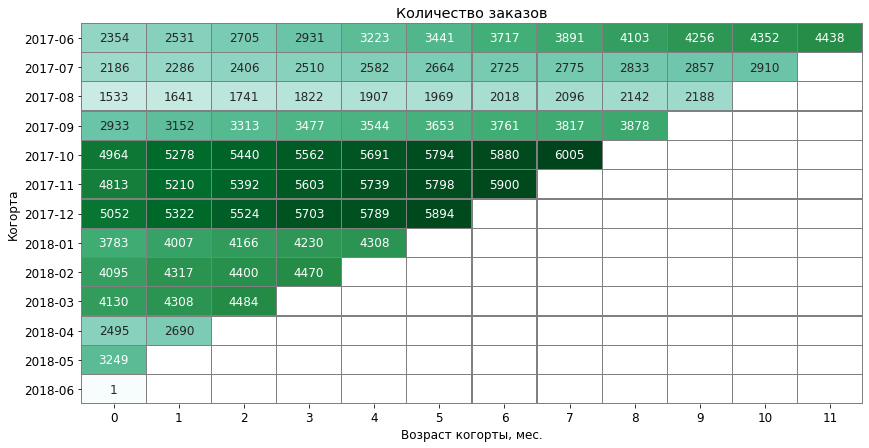

In [78]:
#график heatmap по когортам
plt.figure(figsize=(14, 7))
sns.heatmap(output_q_orders_cum, annot=True, fmt='.0f', linewidths=0.2, linecolor='gray', cmap='BuGn', cbar=False)
plt.title('Количество заказов')
plt.xlabel('Возраст когорты, мес.', fontsize = 12, fontweight=500)
plt.ylabel('Когорта', fontsize = 12, fontweight=500);

Наиболее активными покупателями являются пользователи из когорт последнего квартала 2017 года - за 6 месяцев с момента первой покупки ими было сделано больше всего заказов по сравнению со всеми остальными покупателями. Скорее всего это объясняется тем, что на горизонте в 6 месяцев эти когорты захватили все основные праздники: новый год, 23 февраля и 8 марта. Второй причиной может быть изначально большее количество новых покупателей в указанный период по сравнению с другими когортами.

<a name="h3.2.3"></a>
###### Средний чек

In [79]:
print('Средний чек за период с июня 2017 по конец мая 2018 года:', round(orders['revenue'].mean()),'тыс.руб.')

Средний чек за период с июня 2017 по конец мая 2018 года: 5 тыс.руб.


Рассмотрим как меняется размер **среднего чека в зависимости от месяца продаж**, добавив в таблицу `orders_by_month` новый столбец:

In [80]:
orders_by_month['average_check'] = orders_by_month['revenue'] / orders_by_month['uid']

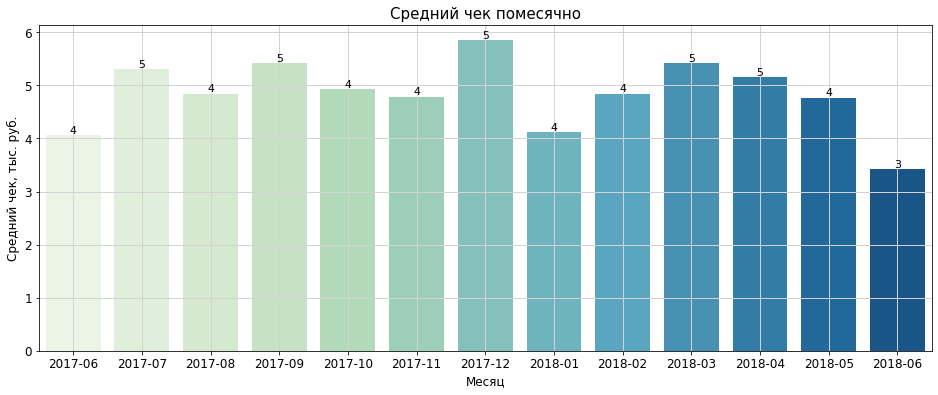

In [81]:
#отразим на графике помесячно размер среднего чека
sns_barplot(orders_by_month, 'purchase_month', 'average_check')
 
plt.title("Средний чек помесячно", fontsize = 15)
plt.xlabel("Месяц", fontsize = 12, fontweight=500)
plt.ylabel('Средний чек, тыс. руб.', fontsize = 12, fontweight=500)
plt.show();

Величина среднего чека меняется от месяца к месяцу, при этом в целом роста показателя не наблюдается.

Рассчитаем **средний чек** по когортам. Для этого необходимо:  
- сгруппировать новую таблицу с заказами `orders_new` по месяцу первой покупки и рассчитать возраст когорт;
- отобразить на графике `heatmap` динамику среднего чека в зависимости от возраста различных когорт.

1. Группировка таблицы с заказами по месяцу первой покупки и определение возраста когорт

In [82]:
cohorts = orders_new.groupby(['first_order_month','order_month']).agg({'revenue': 'mean'}).reset_index()

In [83]:
cohorts['age'] = ((cohorts['order_month'] - cohorts['first_order_month']) / np.timedelta64(1, 'M')).round().astype('int')

2. Динамика среднего чека в зависимости от возраста различных когорт на графике `heatmap`

In [84]:
#для корректного отражения даты заказа на графике, изменим тип данных в столбце first_order_month
cohorts['first_order_month'] = cohorts['first_order_month'].dt.strftime('%Y-%m')

In [85]:
#сводная таблица по показателю "Средний чек"
output_av_check = cohorts.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='revenue', 
        aggfunc= 'mean')

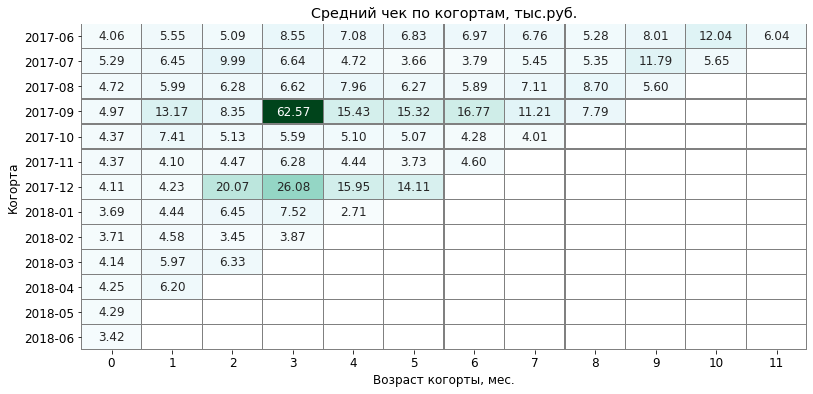

In [86]:
#график heatmap по когортам
plt.figure(figsize=(13, 6))
sns.heatmap(output_av_check, annot=True, fmt='.2f', linewidths=0.2, linecolor='gray', cmap='BuGn', cbar=False)
plt.title('Средний чек по когортам, тыс.руб.')
plt.xlabel('Возраст когорты, мес.', fontsize = 12, fontweight=500)
plt.ylabel('Когорта', fontsize = 12, fontweight=500);

На графике явно выделяются две когорты: сентбярь и декабрь 2017. Их средние чеки в отдельные месяцы в разы превышают средние чеки остальных когорт. Возможно, в этих когортах среди покупателей есть организации, приобретающие подарки своим сотрудникам или клиентам в виде билетов или сертификатов, так как самые крупные заказы приходятся на декабрь, февраль и март.

Рассчитаем **средний чек по рекламным источникам**:

In [87]:
#группируем заказы по рекламным источникам
revenue_by_source = orders_new.groupby(['source_id']).agg({'revenue':'sum', 'uid':'count'}).reset_index()

In [88]:
#рассчитываем размер среднего чека
revenue_by_source['av_check'] = revenue_by_source['revenue'] / revenue_by_source['uid']

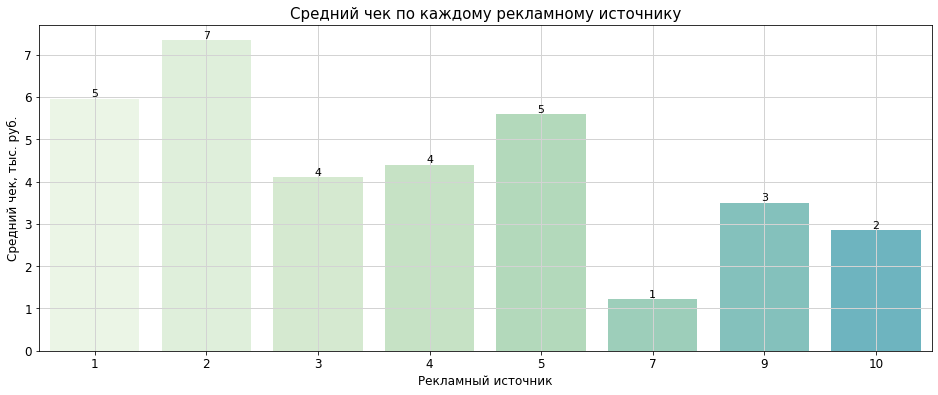

In [89]:
#отразим на графике полученный результат
sns_barplot(revenue_by_source, 'source_id', 'av_check')
 
plt.title("Средний чек по каждому рекламному источнику", fontsize = 15)
plt.xlabel("Рекламный источник", fontsize = 12, fontweight=500)
plt.ylabel('Средний чек, тыс. руб.', fontsize = 12, fontweight=500)
plt.show();

Рекламный источник *№2* заметно выделяется среди остальных размером среднего чека. Стоит обратить на него внимание.

<a name="h3.2.4"></a>
###### Показатель LTV

In [90]:
print('Общий LTV:', round(orders['revenue'].sum() / orders['uid'].nunique()),'тыс.руб.')

Общий LTV: 7.0 тыс.руб.


Рассчитаем **LTV по когортам**. Для этого необходимо:  
- вычислить число новых покупателей в месяц;
- добавить дату первой покупки в таблицу с заказами;
- сгруппировать таблицу и посчитать выручку.

Посчитаем количество новых покупателей за каждый месяц на основании таблицы с информацией о первых заказах `first_orders`:

In [91]:
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку:

In [92]:
cohorts = orders_new.groupby(['first_order_month','order_month']).agg({'revenue': 'sum', 'source_id': 'first'}).reset_index()

Добавим в таблицу cohorts данные о том, сколько людей первый раз совершили покупку в каждый месяц:

In [93]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

,first_order_month,n_buyers,order_month,revenue,source_id
0,2017-06-01,2023,2017-06-01,9557.49,1
1,2017-06-01,2023,2017-07-01,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,1
3,2017-06-01,2023,2017-09-01,1931.30,1
4,2017-06-01,2023,2017-10-01,2068.58,1


Добавим столбец с возрастом когорт на момент заказа:

In [94]:
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

Рассчитаем **LTV**:

In [95]:
report['ltv'] = report['revenue'] / report['n_buyers']

Для корректного отражения даты заказа в heatmap, изменим тип данных в столбце `first_order_month`:

In [96]:
#создазим копию данных для дальнейших изменений
report_copy = report.copy()

Ограничим выборку данными по когортам, прожившим хотя бы 6 месяцев.

In [97]:
report_copy = report_copy[report_copy['first_order_month'] < '2018-01-01']

In [98]:
report_copy_6m = report_copy[report_copy['age'] <= 5]

In [99]:
report_copy_6m['first_order_month'] = report_copy_6m['first_order_month'].dt.strftime('%Y-%m')

И соберем сводную таблицу по показателю **LTV**

In [100]:
LTV_cogorts = report_copy_6m.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc= 'mean').cumsum(axis=1)

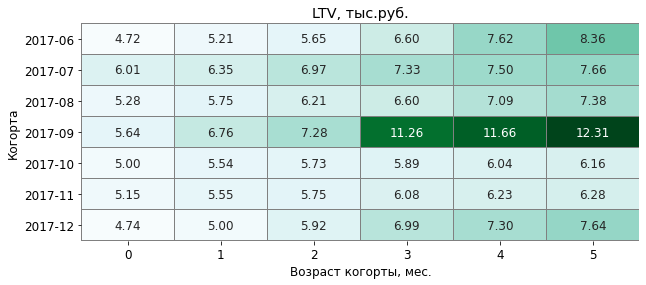

In [101]:
plt.figure(figsize=(10, 4))
sns.heatmap(LTV_cogorts, annot=True, fmt='.2f', linewidths=0.2, linecolor='gray', cmap='BuGn', cbar=False)
plt.title('LTV, тыс.руб.')
plt.xlabel('Возраст когорты, мес.', fontsize = 12, fontweight=500)
plt.ylabel('Когорта', fontsize = 12, fontweight=500);

Наиболее доходными покупателями являются пользователи когорты от сентября 2017. 

Рассчитаем **LTV по рекламным источникам**. Для этого необходимо:

- вычислить число новых покупателей за каждую дату;
- добавить дату первой покупки в таблицу с заказами;
- сгруппировать таблицу и посчитать выручку.

In [102]:
orders_new.head(3)

,buy_ts,revenue,uid,purchase_month,order_month,first_order_month,start_ts,source_id,device
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06,2017-06-01,2017-06-01,2017-06-01 00:09:00,1,desktop
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06,2017-06-01,2017-06-01,2017-06-01 00:14:00,2,desktop
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06,2017-06-01,2017-06-01,2017-06-01 00:25:00,2,desktop


In [103]:
orders_new_copy = orders_new.copy()

In [104]:
orders_new_copy_source = orders_new_copy.groupby(['source_id','first_order_month']).agg({'uid':'nunique'}).reset_index()

In [105]:
orders_new_copy_source['source_month'] = orders_new_copy_source.source_id.astype(str).str.cat(
    orders_new_copy_source.first_order_month.astype(str), sep='-')

In [106]:
orders_new_copy_source.head(3)

,source_id,first_order_month,uid,source_month
0,1,2017-06-01,190,1-2017-06-01
1,1,2017-07-01,160,1-2017-07-01
2,1,2017-08-01,113,1-2017-08-01


In [107]:
cohorts_source = orders_new.groupby(['source_id','order_month']).agg({'revenue': 'sum'}).reset_index()

In [108]:
cohorts_source['source_month'] = cohorts_source.source_id.astype(str).str.cat(
    cohorts_source.order_month.astype(str), sep='-')

In [109]:
report_2 = pd.merge(orders_new_copy_source, cohorts_source, on='source_month')

In [110]:
report_2.head(3)

,source_id_x,first_order_month,uid,source_month,source_id_y,order_month,revenue
0,1,2017-06-01,190,1-2017-06-01,1,2017-06-01,1378.70
1,1,2017-07-01,160,1-2017-07-01,1,2017-07-01,1581.68
2,1,2017-08-01,113,1-2017-08-01,1,2017-08-01,1441.49


In [111]:
report_2 = report_2.drop(['source_month', 'source_id_y'], axis=1)

In [112]:
report_2.columns

Index(['source_id_x', 'first_order_month', 'uid', 'order_month', 'revenue'], dtype='object')

In [113]:
report_2.columns = ['source_id', 'first_order_month', 'n_buyers', 'order_month', 'revenue']

In [114]:
#для корректного отражения даты заказа на графике, изменим тип данных в столбце order_month
report_2['order_month'] = report_2['order_month'].dt.strftime('%Y-%m')

In [115]:
report_2['ltv'] = report_2['revenue'] / report_2['n_buyers']

In [116]:
LTV_source = report_2.pivot_table(
        index='source_id', 
        columns='order_month', 
        values='ltv', 
        aggfunc= 'mean')#.cumsum(axis=1)

In [117]:
LTV_source = LTV_source.drop(['2018-06'], axis=1)

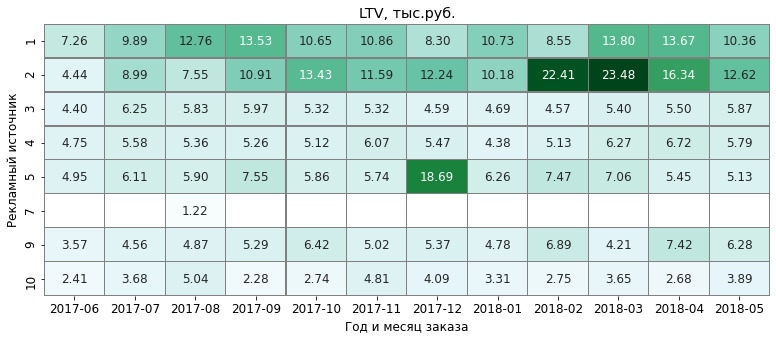

In [118]:
plt.figure(figsize=(13, 5))
sns.heatmap(LTV_source, annot=True, fmt='.2f', linewidths=0.2, linecolor='gray', cmap='BuGn', cbar=False)
plt.title('LTV, тыс.руб.')
plt.xlabel('Год и месяц заказа', fontsize = 12, fontweight=500)
plt.ylabel('Рекламный источник', fontsize = 12, fontweight=500);

Рекламные источники *№2* и *1* привлекают более дорогих клиентов по сравнению с другими источниками.

Ранее мы определили, что наибольшее количество заказов делают когорты последнего квартала 2017. Проверим, не связано ли это с количеством новых покупателей в указанный период.

In [119]:
#для корректного отражения даты заказа на графике, изменим тип данных в столбце first_order_month в таблице cohort_sizes
cohort_sizes['first_order_month'] = cohort_sizes['first_order_month'].dt.strftime('%Y-%m')

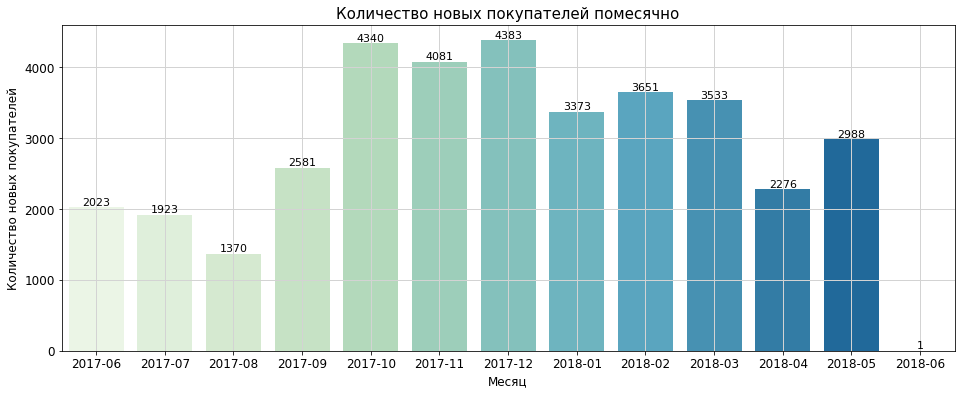

In [120]:
sns_barplot(cohort_sizes, 'first_order_month', 'n_buyers')

#заголовок графика и подписи осей    
plt.title("Количество новых покупателей помесячно", fontsize = 15)
plt.xlabel("Месяц", fontsize = 12, fontweight=500)
plt.ylabel('Количество новых покупателей', fontsize = 12, fontweight=500)
plt.show();

**Вывод**  
Обычно с момента первого посещения сайта до первой покупки проходит всего 1 минута - пользователи точно знают чего хотят, когда обращаются к сервису. Учитывая специфику сайта такое значение показателя не выглядит необычным.   
В течение года из трех покупателей только один сделал второй заказ - среднее количество заказов за год на одного пользователя составило всего 1.38.  На графике также четко прослеживается увеличение спроса в праздничные и предпраздничные месяцы (максимальное число заказов достигнуто в октябре-декабре, феврале и марте). При этом можно отметить, что на горизонте в 6 месяцев после совершения первой покупки больше остальных заказывают когорты последнего квартала 2017 года, что обусловлено как наличием праздников, так и большим размером самих когорт указанного периода.  
Средний чек за год не превысил 5 тыс. руб., хотя этот показатель заметно колеблется от месяца к месяцу, в зависимости от праздников и популярности ожидаемых мероприятий. Наиболее доходным выдался декабрь 2017 года, что скорее всего объясняется новогодними мероприятиями и приобретением подарков.   
Показатель ценности клиентов - LTV - также указывает на то, что покупатели редко делают повторные заказы. Только у двух когорт: 2017-06 и 2017-09 показатель LTV спустя 6 мес. удвоился относительно первого месяца. Возможно, эффективно сработал один из рекламных источников, удачно определивший целевую аудиторию или именно в эти периоды для новых покупателей проводилась акция, распространявшаяся на дальнейшие заказы. 

<a name="h3.3"></a>
#### 3.3 Анализ маркетинга

Необходимо ответить на вопросы ниже:  
- [Сколько денег потратили? Всего / на каждый источник / по времени.](#h3.3.1)
- [Сколько стоило привлечение одного покупателя из каждого источника?](#h3.3.2)
- [На сколько окупились расходы? (ROI)](#h3.3.3)

<a name="h3.3.1"></a>
##### Расходы на рекламу

Выделим год и месяц из дат в таблице с расходами на рекламу и создадим копию датафрейма для дальнейших изменений:

In [121]:
costs['dt_month'] = costs['dt'].astype('datetime64[M]')

In [122]:
costs_copy = costs.copy()

In [123]:
costs_copy['dt_month'] = costs_copy['dt_month'].dt.strftime('%Y-%m')

In [124]:
print('Всего потрачено на рекламу с июня 2017 по конец мая 2018 года:', round(costs['costs'].sum()),'руб.')

Всего потрачено на рекламу с июня 2017 по конец мая 2018 года: 329132.0 руб.


Сгруппируем расходы на маркетинг по месяцам.

In [125]:
costs_by_months = costs_copy.groupby('dt_month')['costs'].sum().reset_index()

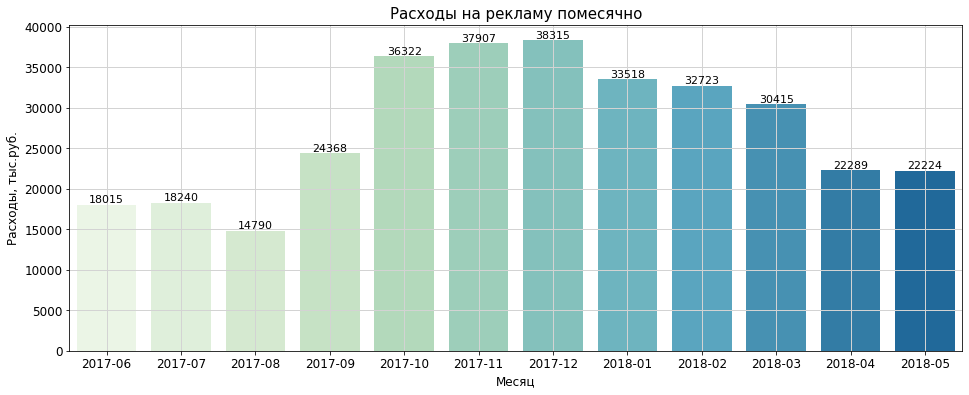

In [126]:
#отразим на графике ежемесячные расходы на маркетинг
sns_barplot(costs_by_months, 'dt_month', 'costs')
 
plt.title("Расходы на рекламу помесячно", fontsize = 15)
plt.xlabel("Месяц", fontsize = 12, fontweight=500)
plt.ylabel('Расходы, тыс.руб.', fontsize = 12, fontweight=500)
plt.show();

Проанализируем расходы на маркетинг по рекламным источникам.

In [127]:
costs_by_source_id = costs_copy.groupby('source_id')['costs'].sum().reset_index()

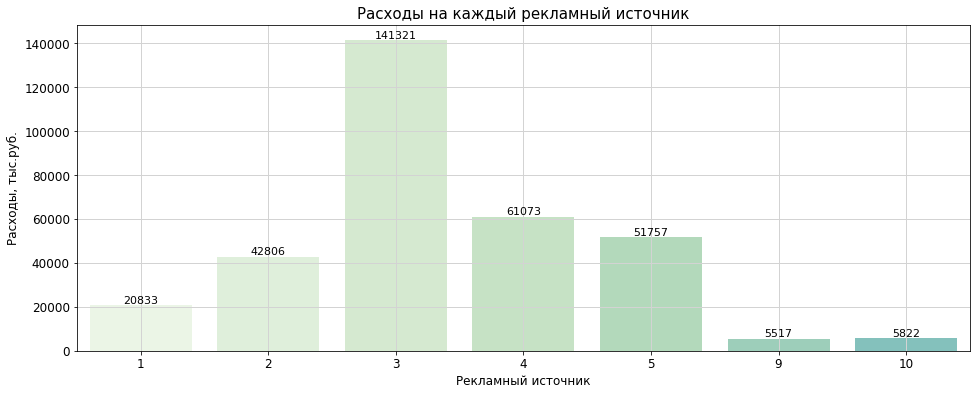

In [128]:
sns_barplot(costs_by_source_id, 'source_id', 'costs')
    
plt.title("Расходы на каждый рекламный источник", fontsize = 15)
plt.xlabel("Рекламный источник", fontsize = 12, fontweight=500)
plt.ylabel('Расходы, тыс.руб.', fontsize = 12, fontweight=500)
plt.show();

Больше 40% всех маркетинговых расходов приходится на рекламный источник №3, при этом на источники №6 и 7 деньги не направлялись вообще, что оправдывает низкий приток новых покупателей по этим каналам. Что касается распределения затрат по месяцам, то больше всего денег на рекламу направлялось в праздничные и предпраздничные месяцы: с октября по март. 

<a name="h3.3.2"></a>
##### Стоимость привлечения одного покупателя

In [129]:
print('Общий САС:', round(costs_copy['costs'].sum() / orders['uid'].nunique()),'тыс.руб.')

Общий САС: 9.0 тыс.руб.


Рассчитаем стоимость привлечения одного покупателя из каждого источника в несколько шагов:  
- объединим данные о первых покупках каждого покупателя (таблица `buyers`) с данными о первых сессиях (таблица `users`);
- сгруппируем пользователей по рекламным источникам;
- объединим с данными о расходах на рекламу (таблица `costs`) сгруппированным по рекламным источникам;
- рассчитаем стоимость привлечения одного покупателя из каждого рекламного источника.

1. Объединение данных о первых покупках и первых сессиях

In [130]:
data = pd.merge(buyers,users, on='uid')
data.head(1)

,uid,buy_ts,time_for_buy,source_id_x,device_x,start_ts,source_id_y,device_y
0,313578113262317,2018-01-03 21:51:00,9.24e+06,2,desktop,2017-09-18 22:49:00,2,desktop


In [131]:
#удалим лишние столбцы и переименуем оставшиеся
data = data.drop(['time_for_buy','source_id_y','device_y'], axis=1)

In [132]:
data.columns

Index(['uid', 'buy_ts', 'source_id_x', 'device_x', 'start_ts'], dtype='object')

In [133]:
data.columns = ['uid', 'buy_ts', 'source_id', 'device', 'start_ts']

2. Группировка пользователей по рекламным источникам

In [134]:
data_by_source_id = data.groupby('source_id')['uid'].count().reset_index()

In [135]:
#проверим, что все покупатели на месте
data_by_source_id['uid'].sum()
orders['uid'].nunique()

36523

36523

3. Объединение с данными о расходах на рекламу (таблица costs) сгруппированным по рекламным источникам

In [136]:
#сгруппируем данные в таблице costs по рекламным источникам
costs_by_source_id = costs_copy.groupby('source_id')['costs'].sum().reset_index()

In [137]:
CAC_by_source_id = pd.merge(data_by_source_id,costs_by_source_id, on='source_id')

4. Расчет стоимости привлечения одного покупателя из каждого рекламного источника

In [138]:
CAC_by_source_id['CAC'] = CAC_by_source_id['costs'] / CAC_by_source_id['uid']

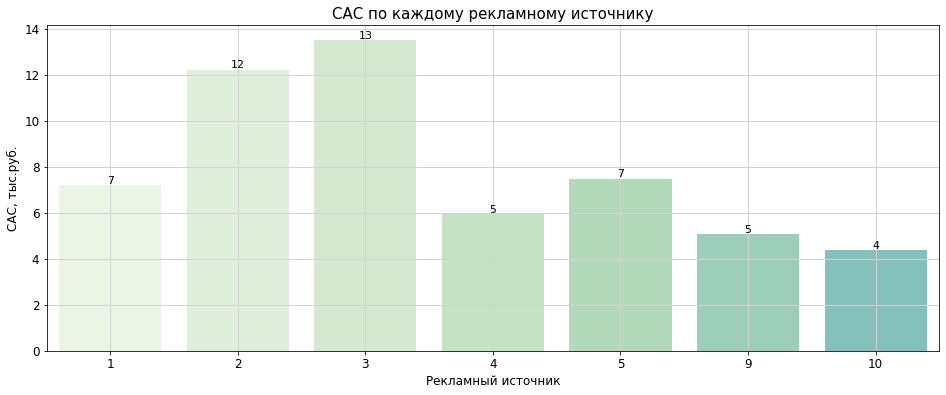

In [139]:
sns_barplot(CAC_by_source_id, 'source_id', 'CAC')
  
plt.title("САС по каждому рекламному источнику", fontsize = 15)
plt.xlabel("Рекламный источник", fontsize = 12, fontweight=500)
plt.ylabel('САС, тыс.руб.', fontsize = 12, fontweight=500)
plt.show();

Рассчитаем помесячную **стоимость привлечения одного покупателя** в разрезе рекламных источников. Для этого необходимо:  
- сгруппировать данные в таблице `buyers`по рекламным источникам и месяцам;
- сгруппировать данные по расходам на маркетинг по рекламным источникам и месяцам;
- объединить данные и построить график.

1. Группировка таблицы с уникальными покупателями по рекламным источникам и месяцам первой покупки

In [140]:
buyers['buy_month'] = buyers['buy_ts'].astype('datetime64[M]')

In [141]:
buyers_by_source_month = buyers.groupby(['source_id', 'buy_month'])['uid'].count().reset_index()

In [142]:
#объединение столбцов source_id и buy_month для дальнейшей консолидации данных
buyers_by_source_month['source_month'] = buyers_by_source_month.source_id.astype(str).str.cat(
    buyers_by_source_month.buy_month.astype(str), sep='-')

2. Группировка расходов на маркетинг по рекламным источникам и месяцам

In [143]:
costs_by_source_mounth = costs.groupby(['source_id', 'dt_month'])['costs'].sum().reset_index()

In [144]:
#объединение столбцов source_id и dt_month для дальнейшей консолидации данных
costs_by_source_mounth['source_month'] = costs_by_source_mounth.source_id.astype(str).str.cat(
    costs_by_source_mounth.dt_month.astype(str), sep='-')

3. Объединие данных и построение графика

In [145]:
for_CAC = pd.merge(costs_by_source_mounth, buyers_by_source_month, on='source_month')

In [146]:
#удаление лишних столбцов и переименование оставшихся
for_CAC.columns

Index(['source_id_x', 'dt_month', 'costs', 'source_month', 'source_id_y',
       'buy_month', 'uid'],
      dtype='object')

In [147]:
for_CAC = for_CAC.drop(['source_id_x', 'dt_month', 'source_month'], axis=1)
for_CAC.columns = ['costs', 'source_id', 'month', 'n_buyers']

In [148]:
#расчет САС
for_CAC['CAC'] = for_CAC['costs'] / for_CAC['n_buyers']

In [149]:
#для корректного отражения даты заказа на графике, изменим тип данных в столбце month
for_CAC['month'] = for_CAC['month'].dt.strftime('%Y-%m')

In [150]:
CAC_source = for_CAC.pivot_table('CAC', index = 'source_id', columns='month', aggfunc='mean')

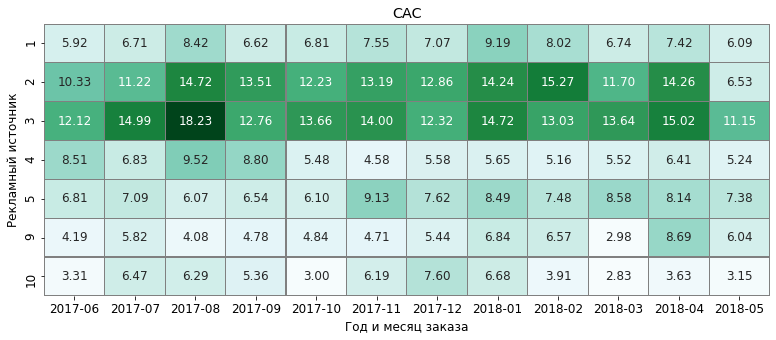

In [151]:
plt.figure(figsize=(13, 5))
sns.heatmap(CAC_source, annot=True, fmt='.2f', linewidths=0.2, linecolor='gray', cmap='BuGn', cbar=False)
plt.title('CAC')
plt.xlabel('Год и месяц заказа', fontsize = 12, fontweight=500)
plt.ylabel('Рекламный источник', fontsize = 12, fontweight=500);

Клиенты из рекламных источников *№2* и *3* самые дорогие, а вот покупатели привлеченные источниками №6 и 7 вообще ничего не стоили бизнесу, правда и денег они не принесли.

<a name="h3.3.3"></a>
##### Окупаемость расходов на рекламу

Рассчитаем окупаемость расходов на рекламу в целом, а также по видам рекламных источников.

In [152]:
#сгруппируем рекламные расходы по месяцам
costs_by_months = costs.groupby('dt_month')['costs'].sum().reset_index()

In [153]:
#добавим к таблице report рекламные расходы
report_new = pd.merge(report, costs_by_months, left_on='first_order_month', right_on='dt_month')

In [154]:
#рассчитаем САС и ROMI
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_new['romi'] = report_new['ltv'] / report_new['cac']

Ограничим выборку данными по когортам, прожившим хотя бы 6 месяцев.

In [155]:
report_new_6m = report_new[report_new['first_order_month'] < '2018-01-01']

In [156]:
#для корректного отражения даты заказа на графике, изменим тип данных в столбце month
report_new_6m['first_order_month'] = report_new_6m['first_order_month'].dt.strftime('%Y-%m')

In [157]:
report_new_6m = report_new_6m[report_new_6m['age'] <= 5]

In [158]:
output = report_new_6m.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean').cumsum(axis=1).round(2)

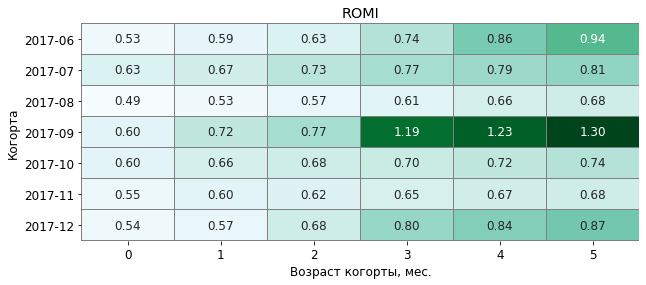

In [159]:
#отразим общий ROMI на графике heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(output, annot=True, fmt='.2f', linewidths=0.2, linecolor='gray', cmap='BuGn', cbar=False)
plt.title('ROMI')
plt.xlabel('Возраст когорты, мес.', fontsize = 12, fontweight=500)
plt.ylabel('Когорта', fontsize = 12, fontweight=500);

Окупилась только сентябрьская когорта на четвертый месяц. Окупаемость остальных когорт в ближайшем будущем под большим вопросом, учитывая темпы изменения **ROMI** в динамике, хотя у июньской когорты есть потенциал. 

Рассчитаем показатель **ROMI** по рекламным источникам

In [160]:
source_id = pd.unique(report_new['source_id']).tolist()
for element in source_id:
    output = report_new[report_new['source_id'] == element].pivot_table(
            index='first_order_month', 
            columns='age', 
            values='romi', 
            aggfunc='mean')
    print('ROMI по рекламному источнику №', element)
    output.cumsum(axis=1).fillna('')

ROMI по рекламному источнику № 1


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.53,0.59,0.63,0.74,0.86,0.94,1,1.1,1.2,1.2,1.3,1.3
2017-07-01,,,,,0.019,,,,,,,
2017-10-01,,,,,,,0.01,,,,,
2017-12-01,,,,0.12,,,,,,,,
2018-02-01,,,0.0088,0.017,,,,,,,,
2018-03-01,,0.035,,,,,,,,,,


ROMI по рекламному источнику № 4


age,0,1,2,3,4,6,8,9
first_order_month,,,,,,,,
2017-07-01,0.63,,,,,0.65,,
2017-08-01,,0.044,,0.08,0.13,,0.15,0.17
2017-09-01,0.6,,0.65,,,,,
2017-10-01,0.6,,,,0.62,,,
2017-11-01,0.55,0.6,,,,,,
2017-12-01,0.54,,,,,,,
2018-02-01,,0.031,,,,,,
2018-04-01,0.48,,,,,,,
2018-05-01,0.63,,,,,,,


ROMI по рекламному источнику № 5


age,0,1,3,5,6,7,9
first_order_month,,,,,,,
2017-07-01,,0.035,0.073,0.09,,0.1,0.12
2017-08-01,,,,,0.02,,
2017-10-01,,0.064,,0.078,,0.092,
2018-03-01,0.56,,,,,,


ROMI по рекламному источнику № 3


age,0,1,2,4,5,6,7,8,10
first_order_month,,,,,,,,,
2017-07-01,,,0.066,,,,,0.083,0.099
2017-08-01,,,0.042,,0.069,,0.11,,
2017-10-01,,,0.023,,,,,,
2017-11-01,,,0.021,0.037,0.043,0.056,,,
2017-12-01,,,0.11,0.14,0.18,,,,
2018-01-01,0.42,0.45,0.48,0.48,,,,,
2018-02-01,0.46,,,,,,,,
2018-03-01,,,0.037,,,,,,


ROMI по рекламному источнику № 10


age,0,1,3
first_order_month,,,
2017-08-01,0.49,,
2017-11-01,,,0.035
2017-12-01,,0.03,


ROMI по рекламному источнику № 2


age,1,3,4,5,6,7,8
first_order_month,,,,,,,
2017-09-01,0.12,0.54,0.58,0.65,0.72,0.75,0.77
2018-01-01,,0.01,,,,,


ROMI по рекламному источнику № 9


age,1,3
first_order_month,,
2017-10-01,,0.019
2018-04-01,0.054,


Вычислим какую часть расходов на рекламу перекрыла полученная выручка за рассматриваемый период.

In [161]:
print('Доля расходов на рекламу, которая была возмещена полученной выручкой:', 
      int(orders['revenue'].sum() * 100 / costs['costs'].sum()), '%')

Доля расходов на рекламу, которая была возмещена полученной выручкой: 76 %


На горизонте в 12 мес. расходы на маркетинг в разрезе рекламных источников практически не окупились. Оправдал себя только источник №1 благодаря июньской когорте 2017 года. Неплохой потенциал показал источник №4  - в первый же месяц полученная выручка перекрывала более 50% расходов на рекламу, однако в дальнейшем повторные заказы практически не совершались.

**Вывод**  
В целом выбранная стратегия рекламной кампании себя не оправдала. Несмотря на то, что с увеличением расходов на рекламу с октября по март наблюдался рост числа новых покупателей и заказов, приток клиентов не окупил вложений. Из всех привлеченных рекламных источников есть смысл обратить внимание на №1 и 4 - их показатель **ROMI** выглядит лучше, чем у других.

<a name="h4"></a>
### 4. Вывод и рекомендации

За 12 месяцев полученная выручка составила всего 76% от понесенных расходов на рекламу. При этом помимо маркетинговых расходов компания несет и другие затраты, которые тоже должны окупаться, чтобы бизнес вышел хотя бы в точку безубыточности.  
В ходе исследования было обнаружено, что наиболее эффективными, согласно показателю **ROMI**, являются рекламные источники №1 и 4, хотя даже их окупаемость достигается не раньше 7 месяца. Отдельного внимания заслуживает источник №2, по которому средний чек покупателей заметно выше, чем по другим источникам, однако по причине высокой стоимости рекламных услуг и небольшого количества заказов, вложения не окупились. Если удастся договориться о снижении стоимости услуг, показатель **ROMI** может значительно улучшится.  
Также есть смысл обратить внимание на развитие платформы для устройств категории *desktop* - сейчас на них приходится 73% всех посещений, однако время с момента первого визита до первого заказа гораздо меньше на устройствах категории *touch*. Возможно последняя платформа обладает более удобным интерфейсом по сравнению с первой.